In [1]:
sales<- read.csv('https://raw.githubusercontent.com/IAA-Faculty/statistical_foundations/master/sales_train.csv') 

website <- read.csv('https://raw.githubusercontent.com/IAA-Faculty/statistical_foundations/master/website_clicks.csv') 

buy <- read.csv('https://raw.githubusercontent.com/IAA-Faculty/statistical_foundations/master/product_buy.csv') 

In [57]:
library(tidyverse)
library(car)
library(vcdExtra)

In [11]:
sales <- sales %>% mutate(across(c(holiday,weekend,display,state), as.factor))
lm.model=lm(y~.,data=sales)
vif(lm.model)

# Create full model and empty model
full.model <- lm(y  ~ . , data = sales)
empty.model <- lm(y ~ 1, data = sales)

# k = 2 for AIC selection
for.model <- step(empty.model,
                  scope = list(lower = empty.model,
                               upper = full.model),
                  direction = "forward", k = 2) 

for.model %>% plot()
shapiro.test(for.model$residuals)

,GVIF,Df,GVIF^(1/(2*Df))
holiday,1.023109,1,1.011488
weekend,1.010917,1,1.005444
pop,1.015094,1,1.007518
display,1.023347,1,1.011606
open,1.010793,1,1.005382
state,1.040852,3,1.006696


In [12]:
# Create full model and empty model
full.model <- lm(y  ~ . , data = sales)
empty.model <- lm(y ~ 1, data = sales)

# k = 2 for AIC selection
for.model <- step(empty.model,
                  scope = list(lower = empty.model,
                               upper = full.model),
                  direction = "forward", k = 2) 

for.model %>% plot()
shapiro.test(for.model$residuals)

Start:  AIC=1846.1
y ~ 1

          Df Sum of Sq   RSS    AIC
+ pop      1     33613  6591 1124.8
+ display  1      1335 38869 1834.6
+ holiday  1      1223 38981 1835.8
<none>                 40204 1846.1
+ weekend  1        54 40150 1847.6
+ open     1         5 40199 1848.0
+ state    3       146 40058 1850.7

Step:  AIC=1124.78
y ~ pop

          Df Sum of Sq    RSS    AIC
+ holiday  1   1592.84 4997.9 1016.1
+ display  1    508.48 6082.3 1094.7
+ state    3     98.48 6492.3 1124.8
<none>                 6590.8 1124.8
+ weekend  1      1.17 6589.6 1126.7
+ open     1      0.57 6590.2 1126.8

Step:  AIC=1016.13
y ~ pop + holiday

          Df Sum of Sq    RSS     AIC
+ display  1    575.21 4422.7  969.22
<none>                 4997.9 1016.13
+ open     1      4.54 4993.4 1017.76
+ weekend  1      3.64 4994.3 1017.83
+ state    3     34.94 4963.0 1019.32

Step:  AIC=969.22
y ~ pop + holiday + display

          Df Sum of Sq    RSS    AIC
<none>                 4422.7 969.22
+ open   

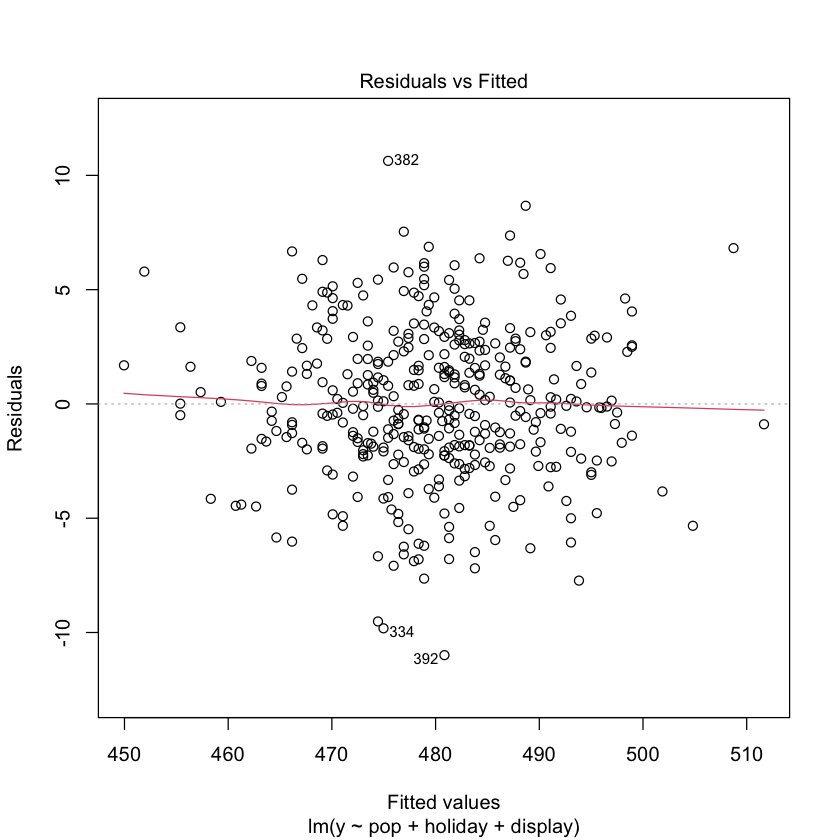

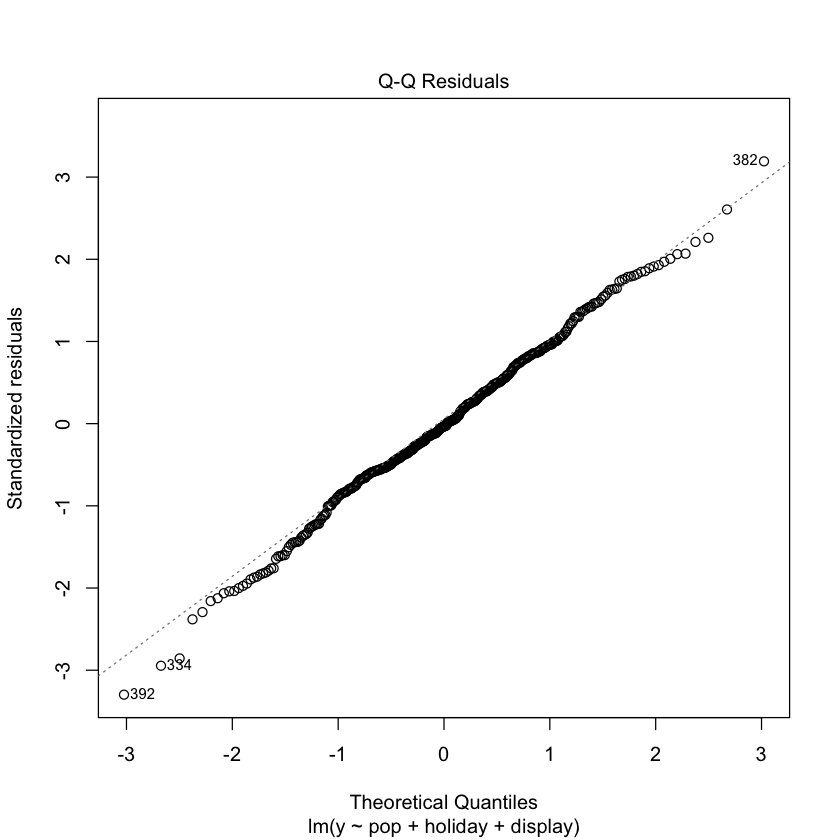

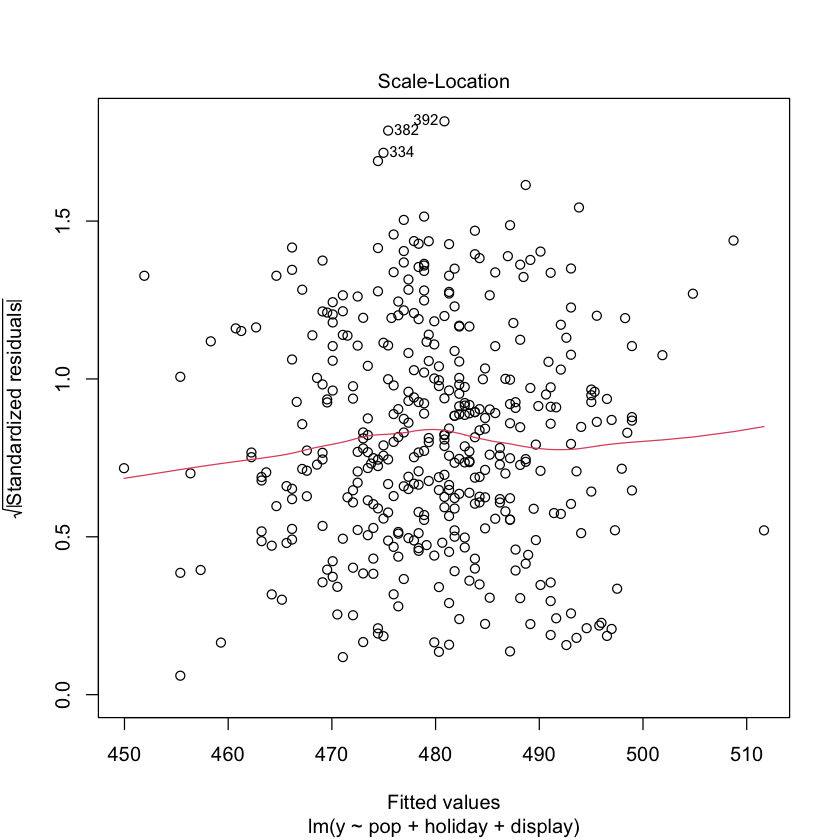


	Shapiro-Wilk normality test

data:  for.model$residuals
W = 0.99679, p-value = 0.6147


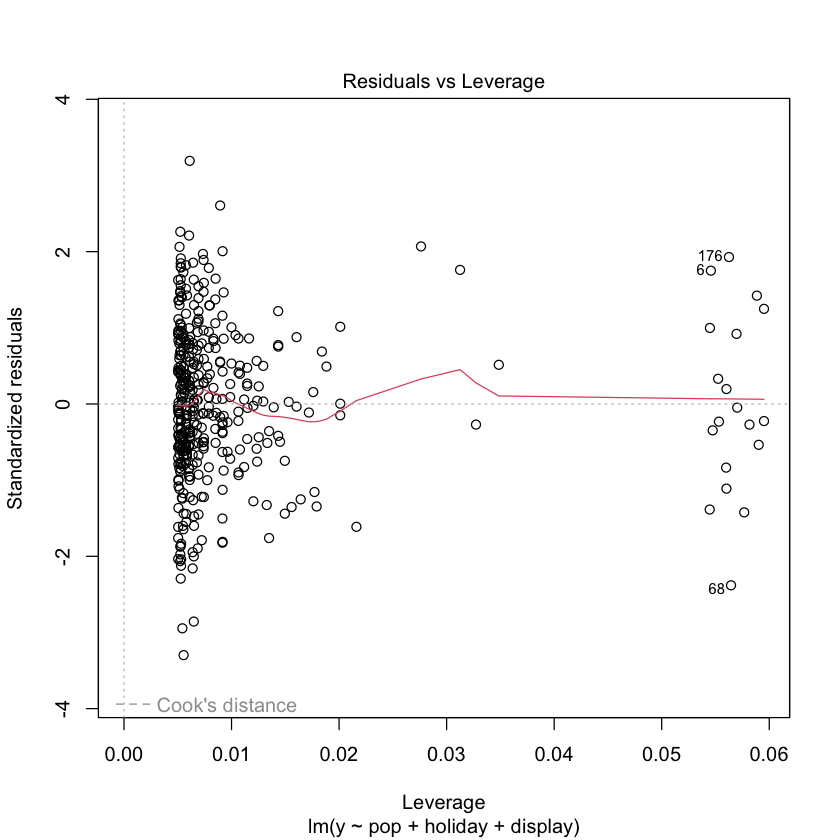

In [19]:

for.model %>% plot()
shapiro.test(for.model$residuals)

Obs,x1,x2,y
<int>,<fct>,<fct>,<int>
26,Upper Right,Classic,55
12,Lower Right,Classic,54
58,Upper Right,Modern,48
103,Lower Left,Mix,50
76,Lower Right,Modern,40


x1,avg
<fct>,<dbl>
Lower Left,53.36667
Lower Right,49.06667
Upper Left,52.96667
Upper Right,51.86667


x1,avg
<fct>,<dbl>
Lower Left,53.36667
Lower Right,49.06667
Upper Left,52.96667
Upper Right,51.86667


             Df Sum Sq Mean Sq F value  Pr(>F)    
x1            3  338.7  112.90   11.12 1.8e-06 ***
Residuals   116 1177.3   10.15                    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

             Df Sum Sq Mean Sq F value   Pr(>F)    
x1            3  338.7  112.90  14.409 5.81e-08 ***
x2            2  123.7   61.86   7.895 0.000631 ***
x1:x2         6  207.3   34.56   4.411 0.000501 ***
Residuals   108  846.2    7.84                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


	Shapiro-Wilk normality test

data:  .
W = 0.99433, p-value = 0.9124


x2,avg
<fct>,<dbl>
Classic,55.0
Mix,51.9
Modern,48.7


            Df Sum Sq Mean Sq F value   Pr(>F)    
x2           2  198.5   99.23    11.6 0.000231 ***
Residuals   27  231.0    8.56                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

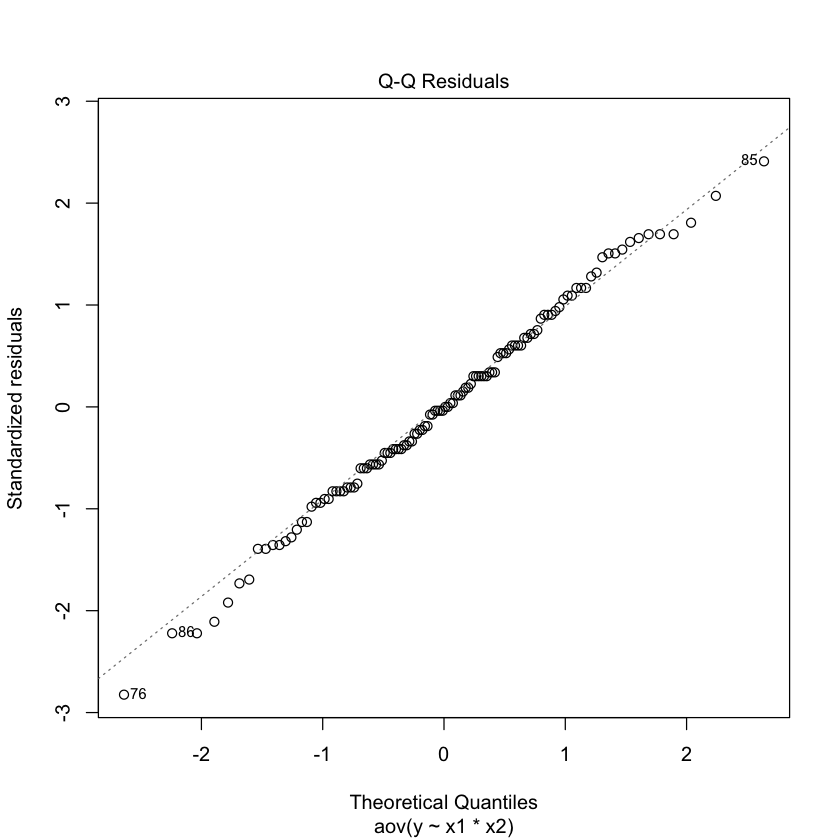

In [41]:
website <- website %>% mutate(across(c(x1,x2), as.factor))
website %>% group_by(x1) %>% summarise(avg = mean(y))
aov(y~x1, data=website) %>% summary()

web_anova <- aov(y~x1*x2, data=website)
web_anova%>%summary()
web_anova%>%plot(2)
web_anova$residuals %>% shapiro.test()

website %>% filter(x1 == "Upper Right") %>% group_by(x2) %>% summarise(avg = mean(y))
website %>% filter(x1 == "Upper Right") %>% aov(y~x2, data=.) %>% summary()

In [71]:
buy <- buy %>% mutate(across(c(Loyalty, Buy), as.factor))
table(buy$Buy, buy$Loyalty)
(58+82)/(58+82+90+57)
(57+82)/(58+82+90+57)
82/(58+82)

CMHtest(table(buy$Buy, buy$Loyalty))$table[1,]

buy_logit <- glm(Buy ~ Loyalty + Age, data = buy, family = binomial(link = "logit"))
summary(buy_logit)

(exp(coef(buy_logit)) - 1)*100
survival::concordance(buy_logit)

   
    No Yes
  0 90  58
  1 57  82

[1] 0.4878049

[1] 0.4843206

[1] 0.5857143

Chisq           Df         Prob 
1.121208e+01 1.000000e+00 8.126657e-04


Call:
glm(formula = Buy ~ Loyalty + Age, family = binomial(link = "logit"), 
    data = buy)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)  1.20224    0.89705   1.340  0.18018   
LoyaltyYes   0.76620    0.24294   3.154  0.00161 **
Age         -0.05339    0.02846  -1.876  0.06068 . 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 397.58  on 286  degrees of freedom
Residual deviance: 382.70  on 284  degrees of freedom
AIC: 388.7

Number of Fisher Scoring iterations: 4


(Intercept)  LoyaltyYes         Age 
 232.754760  115.157508   -5.199165

Call:
concordance.lm(object = buy_logit)

n= 287 
Concordance= 0.6328 se= 0.0327
concordant discordant     tied.x     tied.y    tied.xy 
     12667       7204        701      19714        755 